# Assignment 0: Intro to CS 363D

Your UTCS accounts come with `python` installed but you can’t add packages to it (without root). Especially installing `scipy` and `numpy` on your own can be painful. We recommend using a local install of python, so that you can add any packages you need easily. We will use the python 3 version of [Anaconda](https://docs.continuum.io/), an open-source package and environment manager optimized for data science applications. It’s maintained by Austin-based Continuum Analytics.

## Part 1: Setting up your Jupyter Notebook

### Installing Anaconda on personal computers

* Make sure you have 2.5 GB free space available before you start installing. Use `baobab` to clear unused files and Chrome’s `.config` litter.
* Download the Anaconda - Python 3.6 zip archive from the [official website](https://www.anaconda.com/download/#download). This file is `~500 MB`, and the uncompressed version will be `~2 GB`.

~~~~
$ wget https://repo.continuum.io/archive/Anaconda3-4.4.0-Linux-x86_64.sh
# current as of this assignment
$ bash Anaconda3-4.4.0-Linux-x86_x64.sh
~~~~

* Accept the license agreement and select an installation directory. (Note that the install location defaults to `~/anaconda3`)
* It will take a few minutes to install. Please be patient.
* It will ask you whether to add it to your bash path (your `~/.bashrc` file). Note that the default is “no”. We recommend saying **yes**.
* Start a **new terminal**. Let’s make sure we’re using Anaconda’s Python we just installed.

~~~~
$ which python
/u/pkar/anaconda3/bin/python
# Note:- your username will appear in the path. Mine is 'pkar'.
~~~~

* Let’s start a notebook server.

~~~~
$ jupyter notebook
~~~~

* It should open a browser tab and start a local server.

<img src="imgs/screen1.png">

* Create a directory for this course (I called mine CS363), and make a new Python 3 notebook.
* Have a go at using the notebook interface. We’ll see more of what we can do with Jupyter notebooks in Part 2.

### Installing Jupyter notebooks on lab computers

The Anaconda install is too large for your allocated space in the computer lab. But you can still install Jupyter in the lab without installing Anaconda.

First log into your favorite cs linux machine. Almost all required packages are already installed on those machines.

~~~~
pip3 install --user jupyter
~~~~

Let’s fire up jupyter:

~~~~
ipython3 notebook --no-browser
~~~~

If you’re logged in locally open a browser at the url printed out. Otherwise port forward

~~~~
ssh -NL PORT:localhost:PORT SERVER
~~~~

You can figure out the `PORT` from the url provided by ipython. `SERVER` is the url of the machine you started ipython on.

Pro tip: If you want ipython to survive your SSH login, start it in a screen session.

*Note: This guide is inspired from Prof. Philip Krähenbühl's Neural Network course ([CS 342](http://www.philkr.net/cs342/homework/01/install.html)).*

### Additional Links

* [Stanford CS 231N iPython Tutorial](http://cs231n.github.io/ipython-tutorial/)
* [Jupyter Notebook Beginner Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/)
* [Datacamp Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.PV0TCww)

You may have unforeseen difficulties with this portion of the assignment (not enough disk space, issues with permissions or package versions, conflicts with your personal `.bashrc` or `.zshrc` etc). 
**Please start early** and work with the TA (during office hours) or other classmates to resolve these.

## Part 2: A Simple Data Science Task

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

In [45]:
# Standard Headers
# You are welcome to add additional headers if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'0.23.0'

In [46]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

You can find more on reading (Comma Separated Value) CSV data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [47]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# show the head of the data (first 5 values)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
# display data types of various columns in a dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q1.
1. Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
2. Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
3. Which marital status category has the maximum average work hours per week? which has the minimum?
4. Which marital status category has the most variability in work hours per week? which has the least?

In [49]:
# your code here
adult_data.groupby(['hours-per-week','marital-status'],axis=0).mean()

age         fnlwgt  education-num  \
hours-per-week marital-status                                                   
1              Divorced               74.666667  166224.000000       9.666667   
               Married-civ-spouse     62.625000  121005.625000       9.750000   
               Never-married          35.000000  181313.250000       9.250000   
               Widowed                73.200000  227050.800000       9.400000   
2              Married-civ-spouse     59.850000  209868.550000      10.650000   
               Never-married          26.142857  196984.000000      10.714286   
               Separated              71.000000  494223.000000      10.000000   
               Widowed                76.500000  220418.250000       9.000000   
3              Divorced               67.000000   37170.000000       4.000000   
               Married-AF-spouse      28.000000  169631.000000      12.000000   
               Married-civ-spouse     68.307692  175717.153846      11.384615   
               Married-spouse-absent  47.000000  189761.500000       9.500000   
               Never-married          36.687500  236272.937500       9.250000   
               Widowed                70.833333  146375.666667       9.333333   
4              Divorced               43.333333  204857.333333       9.333333   
               Married-civ-spouse     54.550000  160845.300000      10.600000   
               Never-married          27.800000  174577.400000       8.800000   
               Separated              45.000000  112453.000000       9.000000   
               Widowed                68.700000  107435.200000       8.400000   
5              Divorced               58.000000  248362.857143      11.857143   
               Married-civ-spouse     52.800000  140346.320000      10.000000   
               Married-spouse-absent  55.000000  227203.000000      12.000000   
               Never-married          27.380952  193320.047619       9.142857   
               Widowed                74.166667  119174.000000       9.333333   
6              Divorced               55.250000  181809.250000      10.250000   
               Married-civ-spouse     55.344828  174343.137931      10.931034   
               Married-spouse-absent  79.000000  333230.000000       9.000000   
               Never-married          25.850000  179156.300000       8.400000   
               Separated              51.000000  130667.000000       9.000000   
               Widowed                70.888889  165931.222222      11.333333   
...                                         ...            ...            ...   
84             Never-married          25.600000  112482.400000       9.200000   
85             Divorced               34.000000  156464.000000      13.000000   
               Married-civ-spouse     45.375000  180484.625000       8.250000   
               Never-married          34.500000  153722.500000      10.500000   
86             Married-civ-spouse     47.000000   28035.000000      10.000000   
               Never-married          37.000000  154641.000000       9.000000   
87             Never-married          33.000000   86492.000000       9.000000   
88             Married-civ-spouse     35.500000  224551.000000       8.500000   
89             Married-civ-spouse     45.000000  163552.000000       9.500000   
90             Divorced               44.000000   89312.333333      10.666667   
               Married-AF-spouse      47.000000  117865.000000       9.000000   
               Married-civ-spouse     39.562500  177390.750000      11.125000   
               Married-spouse-absent  61.000000  224784.000000      12.000000   
               Never-married          31.333333  216728.833333      11.333333   
               Separated              51.500000  188442.000000       6.500000   
91             Married-civ-spouse     44.666667  126940.000000       7.666667   
92             Married-civ-spouse     36.000000   48093.000000      10.0000

In [50]:
adult_data.groupby(['hours-per-week','marital-status'],axis=0).median()

age    fnlwgt  education-num  \
hours-per-week marital-status                                         
1              Divorced               74.0  120478.0           11.0   
               Married-civ-spouse     63.5  103399.0            9.0   
               Never-married          25.0  166043.0            9.0   
               Widowed                75.0  244122.0           10.0   
2              Married-civ-spouse     65.5  162962.5           12.0   
               Never-married          24.0  198953.0           11.0   
               Separated              71.0  494223.0           10.0   
               Widowed                76.0  180071.5            9.0   
3              Divorced               67.0   37170.0            4.0   
               Married-AF-spouse      28.0  169631.0           12.0   
               Married-civ-spouse     71.0  177121.0           12.0   
               Married-spouse-absent  47.0  189761.5            9.5   
               Never-married          24.0  227781.5            9.5   
               Widowed                70.5  133375.0           10.0   
4              Divorced               47.0  233571.0            9.0   
               Married-civ-spouse     61.0  151332.5           10.0   
               Never-married          21.0  151542.5            9.5   
               Separated              45.0  112453.0            9.0   
               Widowed                69.5  102298.0            9.0   
5              Divorced               63.0  250091.0           13.0   
               Married-civ-spouse     61.0  133166.0            9.0   
               Married-spouse-absent  55.0  227203.0           12.0   
               Never-married          20.0  207938.0            9.0   
               Widowed                75.5  130044.5            9.0   
6              Divorced               58.0  164699.5           11.0   
               Married-civ-spouse     61.0  169303.0           10.0   
               Married-spouse-absent  79.0  333230.0            9.0   
               Never-married          19.0  163185.0            9.0   
               Separated              51.0  130667.0            9.0   
               Widowed                71.0  170617.0           12.0   
...                                    ...       ...            ...   
84             Never-married          22.0   48393.0           10.0   
85             Divorced               34.0  156464.0           13.0   
               Married-civ-spouse     48.0  172720.5            9.0   
               Never-married          34.0  186114.5            9.0   
86             Married-civ-spouse     47.0   28035.0           10.0   
               Never-married          37.0  154641.0            9.0   
87             Never-married          33.0   86492.0            9.0   
88             Married-civ-spouse     35.5  224551.0            8.5   
89             Married-civ-spouse     45.0  163552.0            9.5   
90             Divorced               42.0   78765.0           10.0   
               Married-AF-spouse      47.0  117865.0            9.0   
               Married-civ-spouse     36.5  164747.5           10.0   
               Married-spouse-absent  61.0  224784.0           12.0   
               Never-married          32.0  177710.0           12.0   
               Separated              51.5  188442.0            6.5   
91             Married-civ-spouse     41.0  114060.0            9.0   
92             Married-civ-spouse     36.0   48093.0           10.0   
94             Married-civ-spouse     33.0  281030.0            9.0   
95             Married-civ-spouse     52.0  129311.0           10.0   
               Never-married          25.0  169759.0            9.0   
96             Married-civ-spouse     42.0  303918.0            9.0   
97             Married-civ-spouse     30.0  166411.5           11.0   
98             Married-civ-spouse     51.0  117095.0            9.0   
               Never-married          22.0  281403.0           

In [51]:
adult_data.groupby(['hours-per-week','marital-status'],axis=0).std()

age         fnlwgt  education-num  \
hours-per-week marital-status                                                   
1              Divorced                6.027714   81805.095019       3.214550   
               Married-civ-spouse      9.620477   56840.990106       3.693624   
               Never-married          22.803509  103584.122485       0.500000   
               Widowed                 4.919350  106126.156770       2.073644   
2              Married-civ-spouse     15.363234  138416.184725       3.674593   
               Never-married           7.668737   46577.707916       1.976047   
               Separated                    NaN            NaN            NaN   
               Widowed                 8.185353  148965.054834       4.082483   
3              Divorced                     NaN            NaN            NaN   
               Married-AF-spouse            NaN            NaN            NaN   
               Married-civ-spouse     12.064995   80689.313375       2.844247   
               Married-spouse-absent  35.355339    6769.133216       0.707107   
               Never-married          22.466920  110673.323995       2.463060   
               Widowed                 9.907909   88694.176015       2.943920   
4              Divorced                6.350853  153004.731497       0.577350   
               Married-civ-spouse     16.417176  102936.250410       2.414866   
               Never-married          15.965753  111077.531270       2.330575   
               Separated                    NaN            NaN            NaN   
               Widowed                14.337596   55847.942594       3.025815   
5              Divorced               12.192894  111030.757462       3.387653   
               Married-civ-spouse     17.187689   60737.008505       3.341656   
               Married-spouse-absent        NaN            NaN            NaN   
               Never-married          15.311682   84497.189065       2.372461   
               Widowed                 8.518607   55024.362430       4.589844   
6              Divorced               17.858238  151147.758597       3.862210   
               Married-civ-spouse     18.722171   90251.540080       2.658289   
               Married-spouse-absent        NaN            NaN            NaN   
               Never-married          15.249763   96556.401667       1.818038   
               Separated                    NaN            NaN            NaN   
               Widowed                 5.510092   92866.683929       3.082207   
...                                         ...            ...            ...   
84             Never-married           7.700649  109213.673111       1.923538   
85             Divorced                     NaN            NaN            NaN   
               Married-civ-spouse      9.984810   70674.788792       3.882194   
               Never-married           6.244998   86322.477762       3.000000   
86             Married-civ-spouse           NaN            NaN            NaN   
               Never-married                NaN            NaN            NaN   
87             Never-married                NaN            NaN            NaN   
88             Married-civ-spouse     12.020815  128488.373209       2.121320   
89             Married-civ-spouse      4.242641  176213.838299       0.707107   
90             Divorced                4.358899   31713.902004       2.081666   
               Married-AF-spouse            NaN            NaN            NaN   
               Married-civ-spouse      9.743160  125786.824161       2.473190   
               Married-spouse-absent        NaN            NaN            NaN   
               Never-married           6.377042  134199.742333       3.386247   
               Separated              23.334524   15338.560297       0.707107   
91             Married-civ-spouse     15.821926   97428.628975       3.214550   
92             Married-civ-spouse           NaN            NaN            N

In [52]:
adult_data.groupby(['hours-per-week','marital-status'],axis=0).mean().max()

age                  79.0
fnlwgt           494223.0
education-num        16.0
capital-gain      49999.5
capital-loss       2824.0
dtype: float64

In [53]:
adult_data.groupby(['hours-per-week','marital-status'],axis=0).mean().min()

age                 20.0
fnlwgt           26911.0
education-num        2.0
capital-gain         0.0
capital-loss         0.0
dtype: float64

Q2. Show the distribution of the dataset with respect to the `education` column. Which plot is most suitable for this? Use matplotlib (or a library of your choice) to plot the distribution.

In [54]:
# your code here
df = adult_data.groupby(["education"],axis=0).size()
adult_data.groupby(["education"],axis=0).size()

education
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
Elem-school      1147
HS-grad         10501
High-school      3055
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64

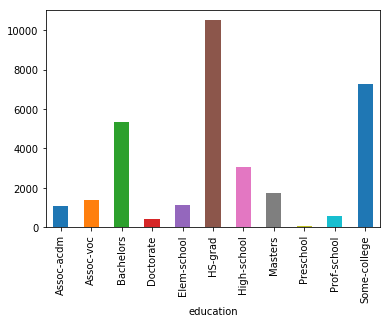

In [55]:
df.plot(kind="bar");

In [56]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q3. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes.

In [57]:
#print (continent_dict)
native_country = continent_dict.keys()
print(native_country)
dc = list(native_country)
print(dc)


dict_keys(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia', '?'])
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 

In [1]:
# You may want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# your code goes here
#adult_data_copy = pd.DataFrame({"native-country":})
adult_data_copy["continent"] = adult_data_copy["native-country"].map(continent_dict)
adult_data["continent"] = adult_data["native-country"].map(continent_dict)


print(adult_data

NameError: name 'adult_data' is not defined

Q4. Plot a bar graph showing the average age of working adults from each continent, and show the standard deviation on the same graph.

An example bar plot.
<img src="imgs/screen3.png">

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class', 'continent']


Age Average                      age         fnlwgt  education-num  capital-gain  \
continent                                                              
Asia           38.043219  176156.596125      11.216095   1507.554396   
Europe         41.600768  178592.238004      10.186180    718.690979   
North-America  38.540090  190104.686382      10.045700   1062.294416   
Other          38.728507  189702.814480      10.636501   1814.146305   
South-America  38.299270  226588.583942       9.233577    198.978102   

               capital-loss  hours-per-week  
continent                                    
Asia             110.862891       40.314456  
Europe            70.032630       41.439539  
North-America     86.415813       40.407864  
Other            124.438914       41.

Text(0.5,1,'Average and Std of Age per Continent')

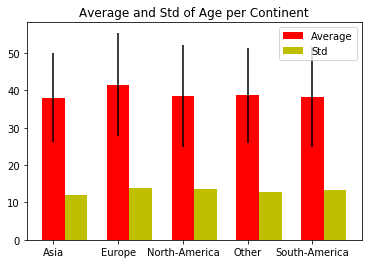

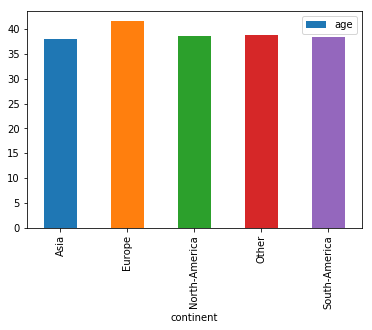

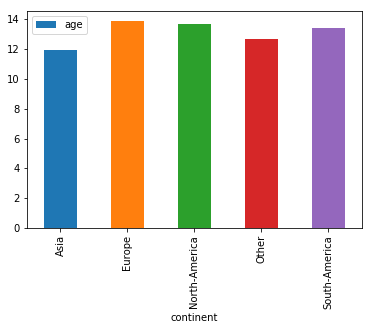

In [59]:
# your code goes here
ax = plt.subplot(111)
print(adult_data.columns.tolist())
print("\n")
age_avg = adult_data.groupby(['continent'],axis=0).mean()
age_std = adult_data.groupby(['continent'],axis=0).std()
print("Age Average",age_avg)
print("\n")
print("Age Standard Deviation",age_std)
print("\n")
age_avg.plot(y="age",kind="bar")
print("\n")
age_std.plot(y="age",kind="bar")
ageMean = age_avg["age"].tolist()
ageStd = age_std["age"].tolist()
N = 5
width = 0.35
ind = np.arange(N)
p1 = ax.bar(ind, ageMean, width, color='r', bottom=0, yerr=ageStd)
p2 = ax.bar(ind + width, ageStd, width,color='y', bottom=0)
ax.set_xticklabels(('','Asia', 'Europe', 'North-America', 'Other', 'South-America'))
ax.legend((p1[0], p2[0]), ('Average', 'Std'))
#ax.yaxis.set_units("")
ax.set_title("Average and Std of Age per Continent")

In [60]:
'''Explain why here (as a comment):


'''

'Explain why here (as a comment):\n\n\n'

## Part 3: Handling Missing Values

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [66]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q6. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. Fill in these missing values with something reasonable.

In [147]:
# your code goes here
#print(leaf_data["eccentricity"])
#leaf_data["eccentricity"].mean()

#leaf_data["eccentricity"].isnull().sum()
leaf_data["eccentricity"] = leaf_data["eccentricity"].fillna(leaf_data["eccentricity"].mean())
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,-0.000022,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,1.763444,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,-1.545117,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,-0.187256,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,-0.969104,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q7. Normalize the `eccentricity` column. Where `value_norm = (value - mean(value)) / std(value)`. Display the head of the new data frame.

In [146]:
# your code goes here

normalized_df = ((leaf_data["eccentricity"] - leaf_data["eccentricity"].mean()) / (leaf_data["eccentricity"].std()))
leaf_data["eccentricity"] = normalized_df
normalized_df.head()
#print(leaf_data["eccentricity"])

0   -0.000022
1    1.763444
2   -1.545117
3   -0.187256
4   -0.969104
Name: eccentricity, dtype: float64

Q8. Plot a scatter plot between `smoothness` and normalized `eccentricity`. Place `smoothness` on the X axis.

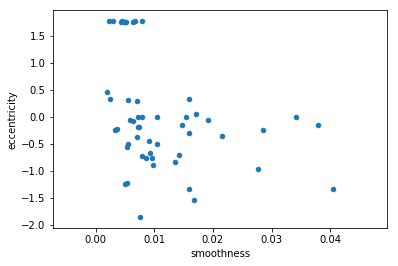

In [90]:
# your code goes here
leaf_data.head()
#leaf_data.groupby(["smoothness","eccentricity"],axis=0)

leaf_data.plot(kind="scatter",x="smoothness",y="eccentricity")

Q9. Now plot the same scatter plot as Q7 but give a different color to each `class` label. What can you infer from this plot (provide a short answer in the form of comments)?

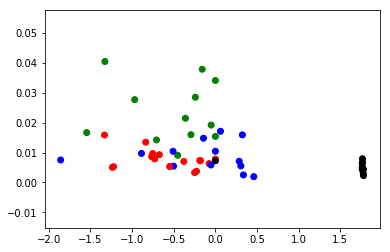

In [143]:
# your code goes here
#leaf_data.head()
eccentricity = leaf_data["eccentricity"].tolist()
smoothness = leaf_data["smoothness"].tolist()
df_class = leaf_data["class"].tolist()

leaf_class = pd.DataFrame(dict(eccentricity= eccentricity, smoothness=smoothness, df_class=df_class))

fig, ax = plt.subplots()


colors = {1:'red', 2:'blue', 3:'green', 4:'black'}

ax.scatter(leaf_class['eccentricity'], leaf_class['smoothness'], c=leaf_class['df_class'].apply(lambda x: colors[x]))
#leaf_data.groupby(["class","eccentricity","smoothness"],axis=0).size()

Q10. Calculate the correlation between the normalized `eccentricity` and the `smoothness` column. 

In [103]:
# your code goes here
leaf_data["eccentricity"].corr(leaf_data["smoothness"])

-0.3544194848908822

Q11. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

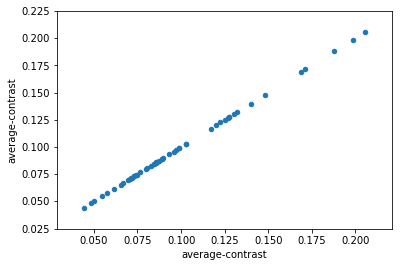

In [160]:
# your code goes here
#leaf_data.groupby(["average-contrast"]).size()
leaf_data.plot(kind="scatter",x="average-contrast",y = "average-contrast")